In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
anime = pd.read_csv('anime.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(anime.shape)

(12294, 7)


In [5]:
user = pd.read_csv('rating.csv')

In [6]:
print(user.shape)

(7813737, 3)


In [7]:
#Я вирішив знайти середній рейтинг кожного користувача. Аніме, рейтинг якого перевищує середній рейтинг користувача, буде присвоєно як лайк

In [8]:
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [9]:
# Користувач 1 має негативний середній рейтинг

In [10]:
user[user['user_id']==456].rating.mean()

8.037735849056604

In [11]:
# Середній рейтинг користувача 456 є 8, що становить більше половини максимального рейтингу

In [12]:
user[user['user_id']==2].rating.mean()

2.6666666666666665

In [13]:
# Користувач 2 має дуже низький середній рейтинг

In [14]:
# Cередній рейтинг на користувача

In [15]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [16]:
MRPU.head(30)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
5,6,-1.000000
6,7,7.387755
7,8,8.333333
8,9,8.000000
9,10,2.875000


In [17]:
user = pd.merge(user, MRPU, on=['user_id', 'user_id'])

In [18]:
user.head(10)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418
5,1,355,-1,-0.712418
6,1,356,-1,-0.712418
7,1,442,-1,-0.712418
8,1,487,-1,-0.712418
9,1,846,-1,-0.712418


In [19]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [20]:
user[user['user_id']== 1].head(10)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [21]:
#4 аніме було призначено як улюблене аніме користувача 1

In [22]:
user[user['user_id']== 456].head(10)

,user_id,anime_id,rating,mean_rating
42719,456,226,9,8.037736
42720,456,853,9,8.037736
42723,456,3655,9,8.037736
42727,456,6746,9,8.037736
42728,456,8129,10,8.037736
42733,456,11757,9,8.037736
42734,456,11771,9,8.037736
42735,456,13601,10,8.037736
42738,456,16035,9,8.037736
42740,456,16498,10,8.037736


In [23]:
user[user['user_id']== 2].head(10)

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [24]:
print(user.shape)

(4262566, 4)


In [25]:
user["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516], dtype=int64)

In [26]:
user = user.rename({'rating':'userRating'}, axis='columns')

In [27]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(15)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [28]:
len(mergedata['anime_id'].unique())

7852

In [29]:
len(anime['anime_id'].unique())

12294

In [30]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
user_anime.shape

(20000, 7852)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [33]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415779
1,-1.773553,-0.272593,0.116392
2,0.218814,-1.232281,-0.985740
3,0.199435,-0.291005,0.681090
4,3.532125,-0.184796,-0.743343


In [34]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

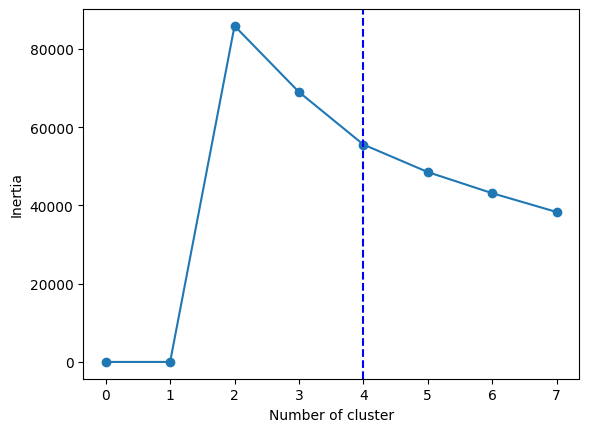

In [36]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

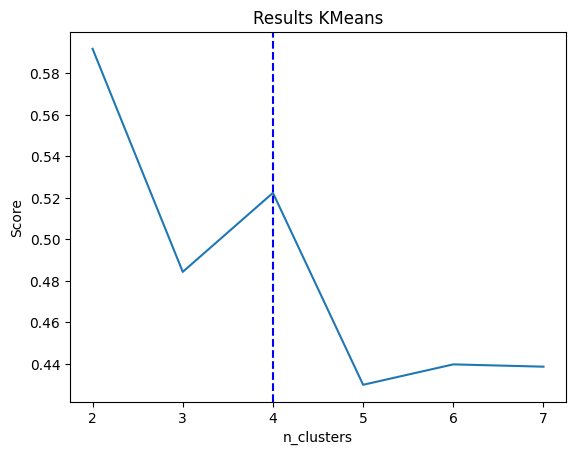

In [37]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Score');
plt.show()

In [38]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.09748002 -0.03718036  0.06961162]
 [ 7.42138078 -0.71317154  0.78750121]
 [ 1.67073597  2.32444767 -0.01593885]
 [ 1.90045273 -1.09606744 -0.44699436]]


C:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


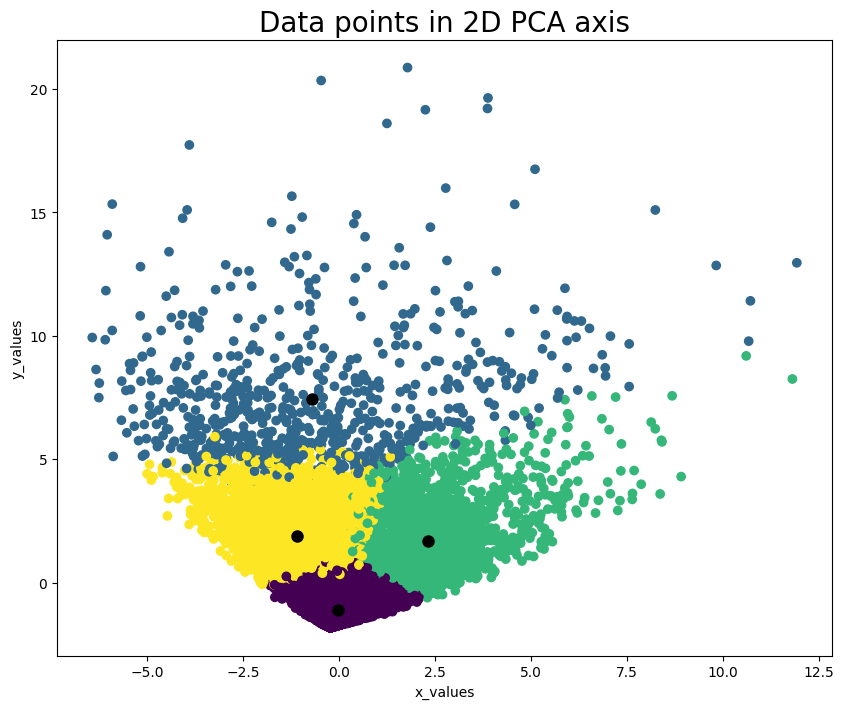

In [39]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='black', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [40]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Columns: 7852 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to xxxHOLiC Shunmuki
dtypes: int64(7852)
memory usage: 1.2 GB


In [41]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Характеристика кожного кластера

In [43]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

In [44]:
#10 кращих аніме, які пояснюють особливості кожного кластера

In [45]:
c0.sort_values(ascending=False)[0:10]

name
Death Note                            0.319365
Shingeki no Kyojin                    0.228056
Sword Art Online                      0.197115
Fullmetal Alchemist: Brotherhood      0.179877
Code Geass: Hangyaku no Lelouch       0.177786
Sen to Chihiro no Kamikakushi         0.159322
Angel Beats!                          0.155788
Fullmetal Alchemist                   0.155644
Code Geass: Hangyaku no Lelouch R2    0.152398
Naruto                                0.145330
dtype: float64

In [46]:
c1.sort_values(ascending=False)[0:10]

name
Angel Beats!                          0.829670
No Game No Life                       0.824176
Toradora!                             0.809066
Steins;Gate                           0.791209
Code Geass: Hangyaku no Lelouch       0.789835
Shingeki no Kyojin                    0.782967
Sword Art Online                      0.766484
Code Geass: Hangyaku no Lelouch R2    0.763736
Death Note                            0.748626
Bakemonogatari                        0.745879
dtype: float64

In [47]:
c2.sort_values(ascending=False)[0:10]

name
Death Note                            0.679588
Code Geass: Hangyaku no Lelouch       0.668793
Code Geass: Hangyaku no Lelouch R2    0.609912
Fullmetal Alchemist                   0.601570
Sen to Chihiro no Kamikakushi         0.583906
Suzumiya Haruhi no Yuuutsu            0.551030
Neon Genesis Evangelion               0.538273
Tengen Toppa Gurren Lagann            0.530913
Cowboy Bebop                          0.526006
Fullmetal Alchemist: Brotherhood      0.508832
dtype: float64

In [48]:
c3.sort_values(ascending=False)[0:10]

name
Shingeki no Kyojin                  0.722766
No Game No Life                     0.633719
Sword Art Online                    0.607896
Death Note                          0.589789
Angel Beats!                        0.589196
Steins;Gate                         0.545266
Fullmetal Alchemist: Brotherhood    0.535767
Toradora!                           0.510240
Mirai Nikki (TV)                    0.504898
Code Geass: Hangyaku no Lelouch     0.501633
dtype: float64

In [49]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [50]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
   
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [51]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [52]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [53]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

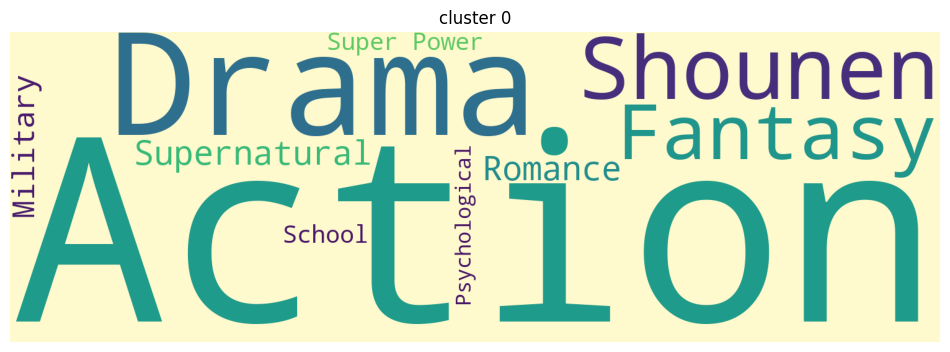

In [54]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [55]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Shounen', 5],
 [' Fantasy', 5],
 [' Supernatural', 5]]

In [56]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


In [57]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.829670
No Game No Life                                        0.824176
Toradora!                                              0.809066
Steins;Gate                                            0.791209
Code Geass: Hangyaku no Lelouch                        0.789835
Shingeki no Kyojin                                     0.782967
Sword Art Online                                       0.766484
Code Geass: Hangyaku no Lelouch R2                     0.763736
Death Note                                             0.748626
Bakemonogatari                                         0.745879
Fullmetal Alchemist: Brotherhood                       0.732143
Hataraku Maou-sama!                                    0.726648
Mirai Nikki (TV)                                       0.723901
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.717033
Clannad                                                0.712912
dtype: float64

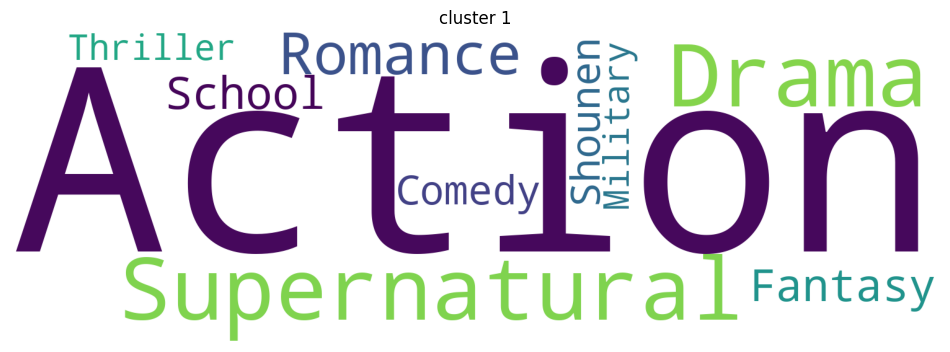

In [58]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [59]:
keyword_occurences[0:5]

[['Action', 7],
 [' Supernatural', 6],
 [' Drama', 6],
 [' Romance', 6],
 [' Fantasy', 5]]

In [60]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 24.333333333333332
AVG movie rating : 8.066666666666666
AVG member : 665432.4666666667


In [61]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.679588
Code Geass: Hangyaku no Lelouch       0.668793
Code Geass: Hangyaku no Lelouch R2    0.609912
Fullmetal Alchemist                   0.601570
Sen to Chihiro no Kamikakushi         0.583906
Suzumiya Haruhi no Yuuutsu            0.551030
Neon Genesis Evangelion               0.538273
Tengen Toppa Gurren Lagann            0.530913
Cowboy Bebop                          0.526006
Fullmetal Alchemist: Brotherhood      0.508832
Mononoke Hime                         0.499509
Toradora!                             0.489696
Elfen Lied                            0.484298
Howl no Ugoku Shiro                   0.478901
Samurai Champloo                      0.477920
dtype: float64

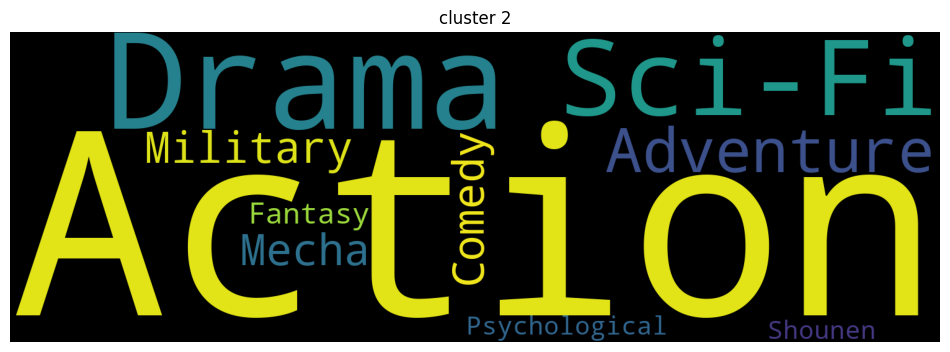

In [62]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [63]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Sci-Fi', 6],
 [' Adventure', 6],
 [' Military', 4]]

In [64]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


In [65]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.722766
No Game No Life                                             0.633719
Sword Art Online                                            0.607896
Death Note                                                  0.589789
Angel Beats!                                                0.589196
Steins;Gate                                                 0.545266
Fullmetal Alchemist: Brotherhood                            0.535767
Toradora!                                                   0.510240
Mirai Nikki (TV)                                            0.504898
Code Geass: Hangyaku no Lelouch                             0.501633
Code Geass: Hangyaku no Lelouch R2                          0.473731
One Punch Man                                               0.458890
Noragami                                                    0.457703
Tokyo Ghoul                                                 0.455031
Ano Hi Mita Hana no Namae wo 

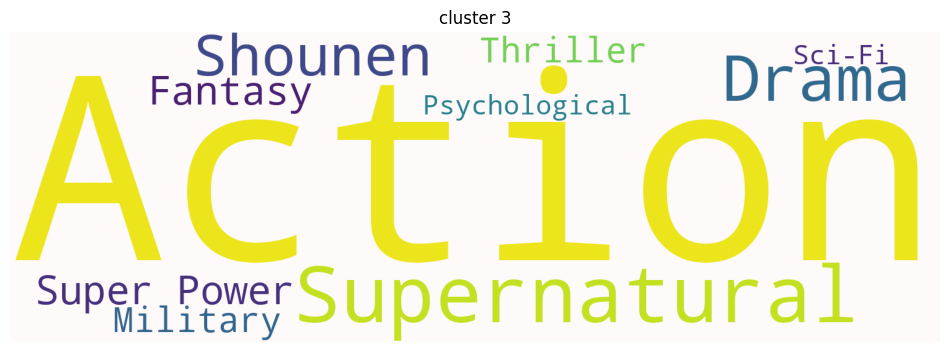

In [66]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [67]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Shounen', 4],
 [' Super Power', 4]]

In [68]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


In [69]:
user_id_to_check = 1999
user_cluster = user_anime.loc[user_id_to_check, 'cluster']
print(f"Користувач {user_id_to_check} належить до кластера {user_cluster}")

Користувач 1999 належить до кластера 3


In [70]:
import joblib

In [71]:
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(clusterer, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [72]:
loaded_pca = joblib.load('pca_model.pkl')
loaded_kmeans = joblib.load('kmeans_model.pkl')

In [73]:
loaded_pca

PCA(n_components=3)

In [74]:
loaded_kmeans

KMeans(n_clusters=4, random_state=30)

In [75]:
print("Centers of Clusters:")
print(centers)

Centers of Clusters:
[[-1.09748002 -0.03718036  0.06961162]
 [ 7.42138078 -0.71317154  0.78750121]
 [ 1.67073597  2.32444767 -0.01593885]
 [ 1.90045273 -1.09606744 -0.44699436]]


In [76]:
print("Cluster Labels for Users:")
print(c_preds)

Cluster Labels for Users:
[0 0 3 ... 0 3 0]
